In [912]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

data1 = pd.read_csv('dummy-Current_20170504CSV.csv')
data2 = pd.read_csv('dummy_Current2_20170504CSV.csv')

--- Tabulation for data1

In [913]:
data1_cnd450 = data1[data1.columns[1:8]]
data1_cnd450.columns = data1_cnd450.ix[0]
data1_cnd450 = data1_cnd450.drop(data1_cnd450.index[0])
data1_cnd450.index = data1['Voltage'].values[1:]
data1_cnd450 = data1_cnd450.astype(float)

In [914]:
data1_cnd900 = data1[data1.columns[8:15]]
data1_cnd900.columns = data1_cnd900.ix[0]
data1_cnd900 = data1_cnd900.drop(data1_cnd900.index[0])
data1_cnd900.index = data1['Voltage'].values[1:]
data1_cnd900 = data1_cnd900.astype(float)

In [915]:
data1_cnd180 = data1[data1.columns[15:22]]
data1_cnd180.columns = data1_cnd180.ix[0]
data1_cnd180 = data1_cnd180.drop(data1_cnd180.index[0])
data1_cnd180.index = data1['Voltage'].values[1:]
data1_cnd180 = data1_cnd180.astype(float)

In [916]:
data1_cnd360 = data1[data1.columns[22:29]]
data1_cnd360.columns = data1_cnd360.ix[0]
data1_cnd360 = data1_cnd360.drop(data1_cnd360.index[0])
data1_cnd360.index = data1['Voltage'].values[1:]
data1_cnd360 = data1_cnd360.astype(float)

--- Tabulation for data2

In [917]:
data2_cnd450 = data2[data2.columns[1:8]]
data2_cnd450.columns = data2_cnd450.ix[0]
data2_cnd450 = data2_cnd450.drop(data2_cnd450.index[0])
data2_cnd450.index = data2['Voltage'].values[1:]
data2_cnd450 = data2_cnd450.astype(float)

In [918]:
data2_cnd900 = data2[data2.columns[8:15]]
data2_cnd900.columns = data2_cnd900.ix[0]
data2_cnd900 = data2_cnd900.drop(data2_cnd900.index[0])
data2_cnd900.index = data2['Voltage'].values[1:]
data2_cnd900 = data2_cnd900.astype(float)

In [919]:
data2_cnd180 = data2[data2.columns[15:22]]
data2_cnd180.columns = data2_cnd180.ix[0]
data2_cnd180 = data2_cnd180.drop(data1_cnd180.index[0])
data2_cnd180.index = data2['Voltage'].values[1:]
data2_cnd180 = data2_cnd180.astype(float)

In [920]:
data2_cnd360 = data2[data2.columns[22:29]]
data2_cnd360.columns = data2_cnd360.ix[0]
data2_cnd360 = data2_cnd360.drop(data2_cnd360.index[0])
data2_cnd360.index = data2['Voltage'].values[1:]
data2_cnd360 = data2_cnd360.astype(float)

--- Building plots I(t) for different voltages for the specific condition 

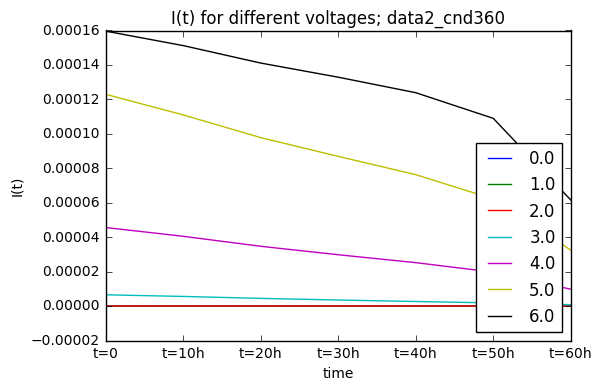

In [921]:
### the data for the graph
X = data2_cnd360
str1 = 'data2_cnd360'

data_plt = X.T
data_plt = data_plt[data_plt.columns[0::10]]
pl = data_plt.plot()
pl.set_ylabel('I(t)')
pl.set_xlabel('time')
pl.legend(loc = 'lower right')
pl.set_title('I(t) for different voltages; ' + str1)

--- Building comparison plots picking one voltage value

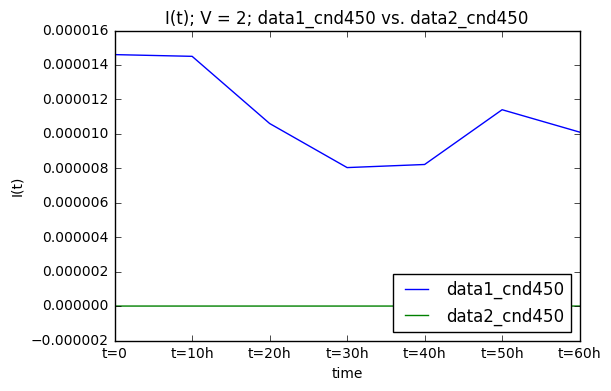

In [922]:
### the data for the graph
V = 2
X1 = data1_cnd900
X2 = data2_cnd900
str1 = 'data1_cnd450'
str2 = 'data2_cnd450'

x1p = X1.ix[V]
x2p = X2.ix[V]
df = pd.concat([x1p, x2p], axis=1, keys = [str1, str2])
pl = df.plot()
pl.set_ylabel('I(t)')
pl.set_xlabel('time')
pl.legend(loc = 'lower right')
pl.set_title('I(t); V = '+str(V)+'; '+str1+' vs. '+str2)

--- Linear regression for single data set

In [923]:
import re
from sklearn.linear_model import LinearRegression as lm

V = 6
X = data2_cnd360
str1 = 'data2_cnd360'

def get_time(string):
    return int(re.findall('\d+', string)[0])

xlm = X.ix[V]
vals = xlm.values
time = np.array([get_time(x) for x in list(xlm.index)])
model = lm()
model.fit(time.reshape(7,1), vals.reshape(7,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

--- Linear regression graph

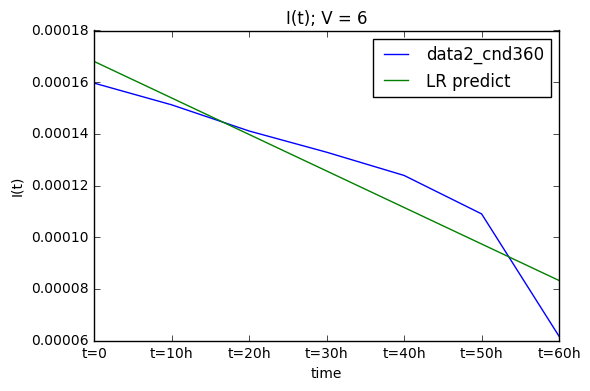

In [924]:
df_lr = pd.Series(model.predict(time.reshape(7,1)).T[0], index = xlm.index)
df = pd.concat([xlm, df_lr], axis=1, keys = [str1, 'LR predict'])
pl = df.plot()
pl.set_ylabel('I(t)')
pl.set_xlabel('time')
pl.legend(loc = 'upper right')
pl.set_title('I(t); V = '+str(V))

--- The regression parameters for all the curves (intercept and angle coefficient)

In [939]:
X = data2_cnd360
V_arr = X.index
intercept = []
coef = []
for V in list(V_arr):
    xlm = X.ix[V]
    vals = xlm.values[:7]
    model = lm()
    model.fit(time.reshape(7,1), vals.reshape(7,1))
    model.intercept_[0]
    intercept.append(model.intercept_[0])
    coef.append(model.coef_[0][0])

data2_cnd360['intercept'] = intercept
data2_cnd360['coef'] = coef

--- The correlations between intercepts

Pearson correlations coefficient: 0.99931697186


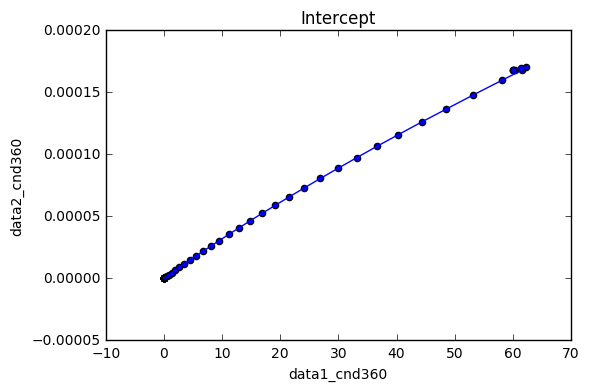

In [972]:
from scipy.stats.stats import pearsonr

X = data1_cnd360['intercept']
Y = data2_cnd360['intercept']
str1 = 'data1_cnd360'
str2 = 'data2_cnd360'
plt.plot(X,Y)
plt.scatter(X,Y)
plt.xlabel(str1)
plt.ylabel(str2)
plt.title('Intercept')
print('Pearson correlations coefficient: '+ str(pearsonr(X,Y)[0]))

--- Correlations between angle coefficients

Pearson correlations coefficient: 0.796990556972


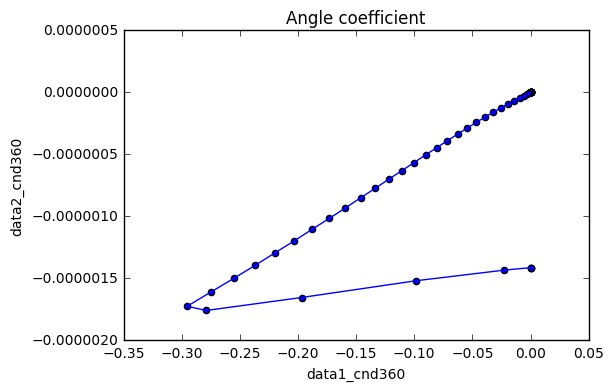

In [973]:
from scipy.stats.stats import pearsonr

X = data1_cnd360['coef']
Y = data2_cnd360['coef']
str1 = 'data1_cnd360'
str2 = 'data2_cnd360'
plt.plot(X,Y)
plt.scatter(X,Y)
plt.xlabel(str1)
plt.ylabel(str2)
plt.title('Angle coefficient')
print('Pearson correlations coefficient: '+ str(pearsonr(X,Y)[0]))